In [5]:
from pypylon import pylon

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()

# demonstrate some feature access
new_width = camera.Width.Value - camera.Width.Inc
if new_width >= camera.Width.Min:
    camera.Width.Value = new_width

numberOfImagesToGrab = 100
camera.StartGrabbingMax(numberOfImagesToGrab)

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

    grabResult.Release()
camera.Close()

RuntimeException: No device is available or no device contains the provided device info properties. : RuntimeException thrown (file 'tlfactory.cpp', line 694)

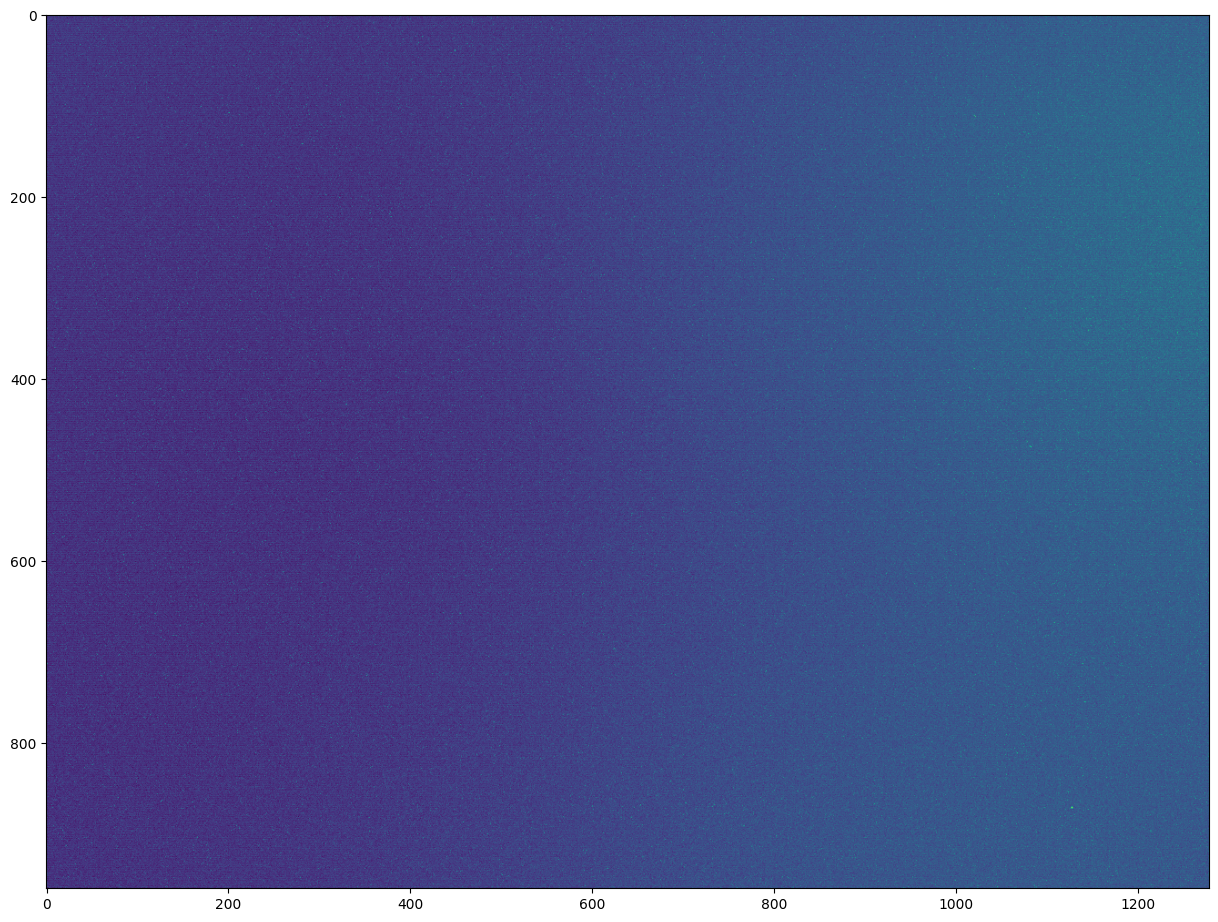

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15,15))
plt.imshow(img)